In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
type(x_train)

numpy.ndarray

In [53]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (60000, 28, 28)
Training Labels Shape :  (60000,)
Testing Data Shape    :  (10000, 28, 28)
Testing Labels Shape  :  (10000,)


(-0.5, 27.5, 27.5, -0.5)

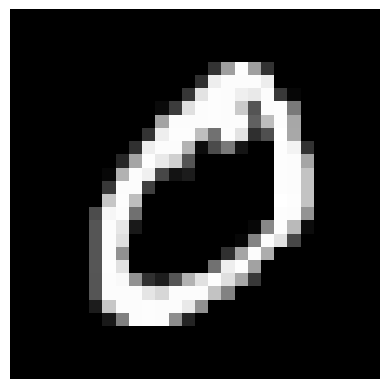

In [54]:
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off')

In [55]:
np.set_printoptions(linewidth = 200)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [56]:
x_train[1].shape

(28, 28)

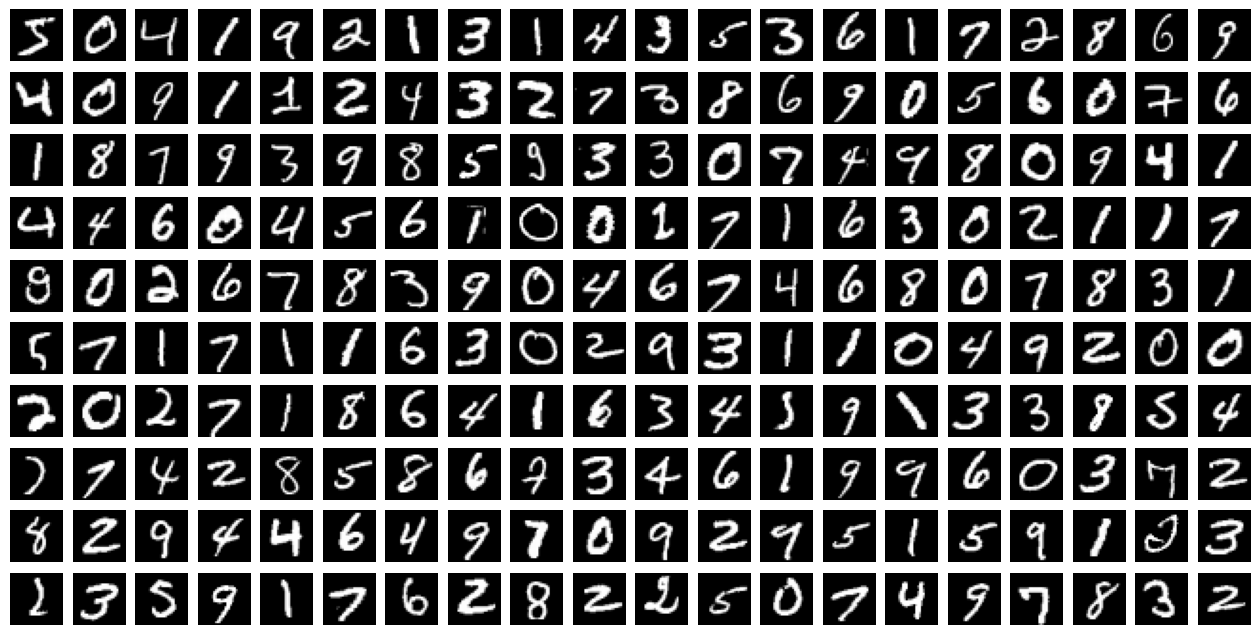

In [57]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')



---



---

In [58]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [59]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [60]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [61]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (60000, 28, 28, 1)
Training Labels Shape :  (60000, 10)
Testing Data Shape    :  (10000, 28, 28, 1)
Testing Labels Shape  :  (10000, 10)


In [62]:
# Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    # rotation_range = 10,
    # zoom_range = 10,
    # shear_range = 10,
    # horizontal_flip = True,
    # vertical_flip = True
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 1000)

In [63]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 1000)

# Steps to Create and train a neural network
  1. Create the architecture
  2. Compile the model
  3. Fit the model

In [64]:
# Creating an architecture

'''
model = tf.keras.models.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(200, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
'''

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               157000    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [66]:
# Fit the model
history = model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 100,
    verbose = 1)

Epoch 1/100
60/60 [==============================] - 18s 282ms/step - loss: 2.2529 - accuracy: 0.1726 - val_loss: 2.1408 - val_accuracy: 0.2860
Epoch 2/100
60/60 [==============================] - 17s 283ms/step - loss: 2.1302 - accuracy: 0.2924 - val_loss: 1.9609 - val_accuracy: 0.4749
Epoch 3/100
60/60 [==============================] - 18s 304ms/step - loss: 2.0048 - accuracy: 0.4019 - val_loss: 1.7631 - val_accuracy: 0.6028
Epoch 4/100
60/60 [==============================] - 19s 310ms/step - loss: 1.8706 - accuracy: 0.4719 - val_loss: 1.5576 - val_accuracy: 0.6813
Epoch 5/100
60/60 [==============================] - 20s 340ms/step - loss: 1.7334 - accuracy: 0.5191 - val_loss: 1.3612 - val_accuracy: 0.7317
Epoch 6/100
60/60 [==============================] - 18s 301ms/step - loss: 1.6050 - accuracy: 0.5519 - val_loss: 1.1923 - val_accuracy: 0.7609
Epoch 7/100
60/60 [==============================] - 17s 289ms/step - loss: 1.4927 - accuracy: 0.5750 - val_loss: 1.0571 - val_accuracy:

In [67]:
type(history.history)

dict

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val  = history.history['val_loss']

num_epochs = range(1,101)

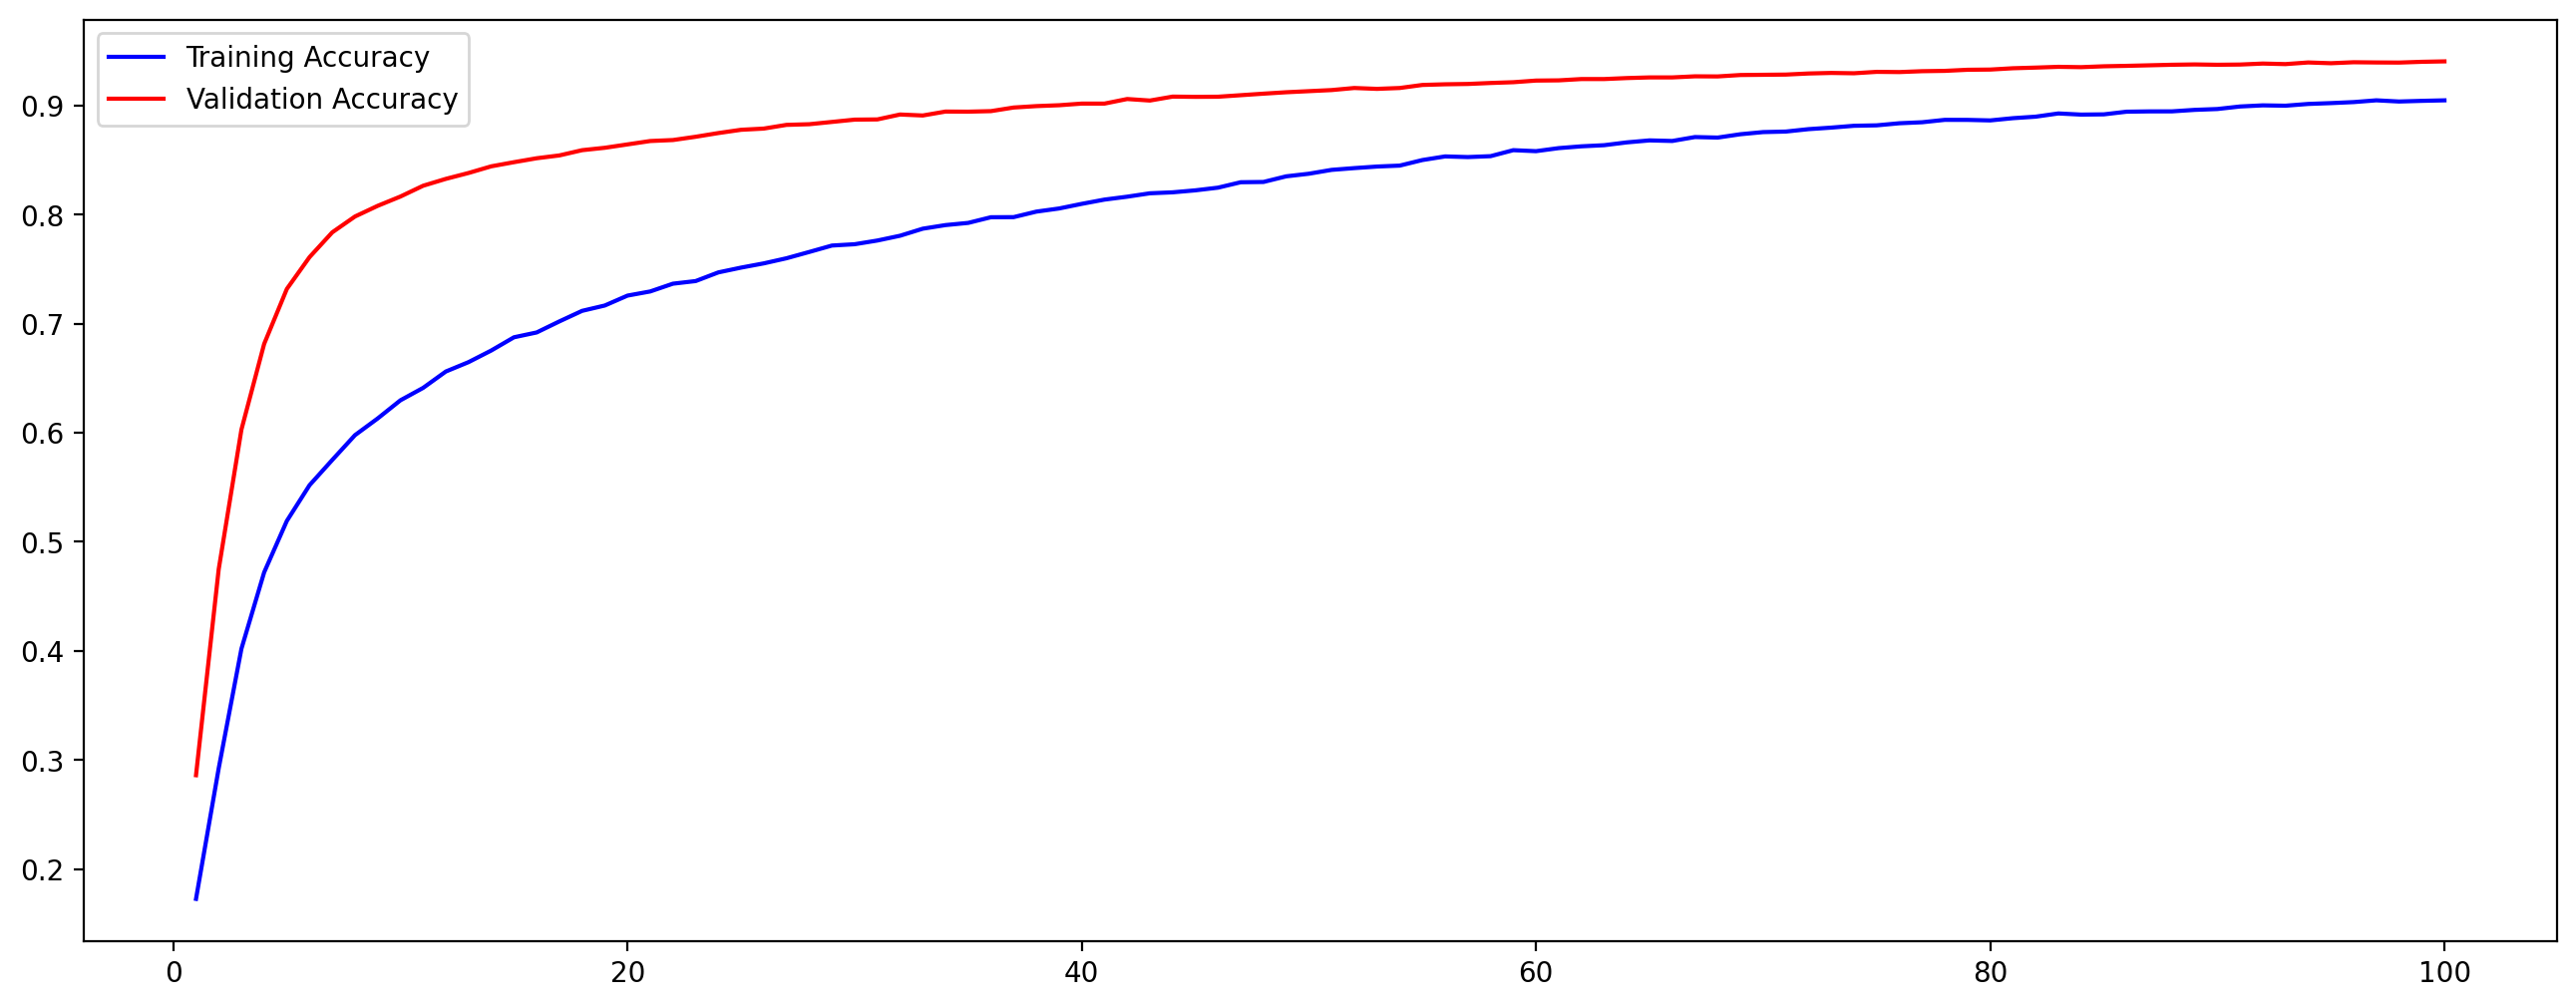

In [70]:
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

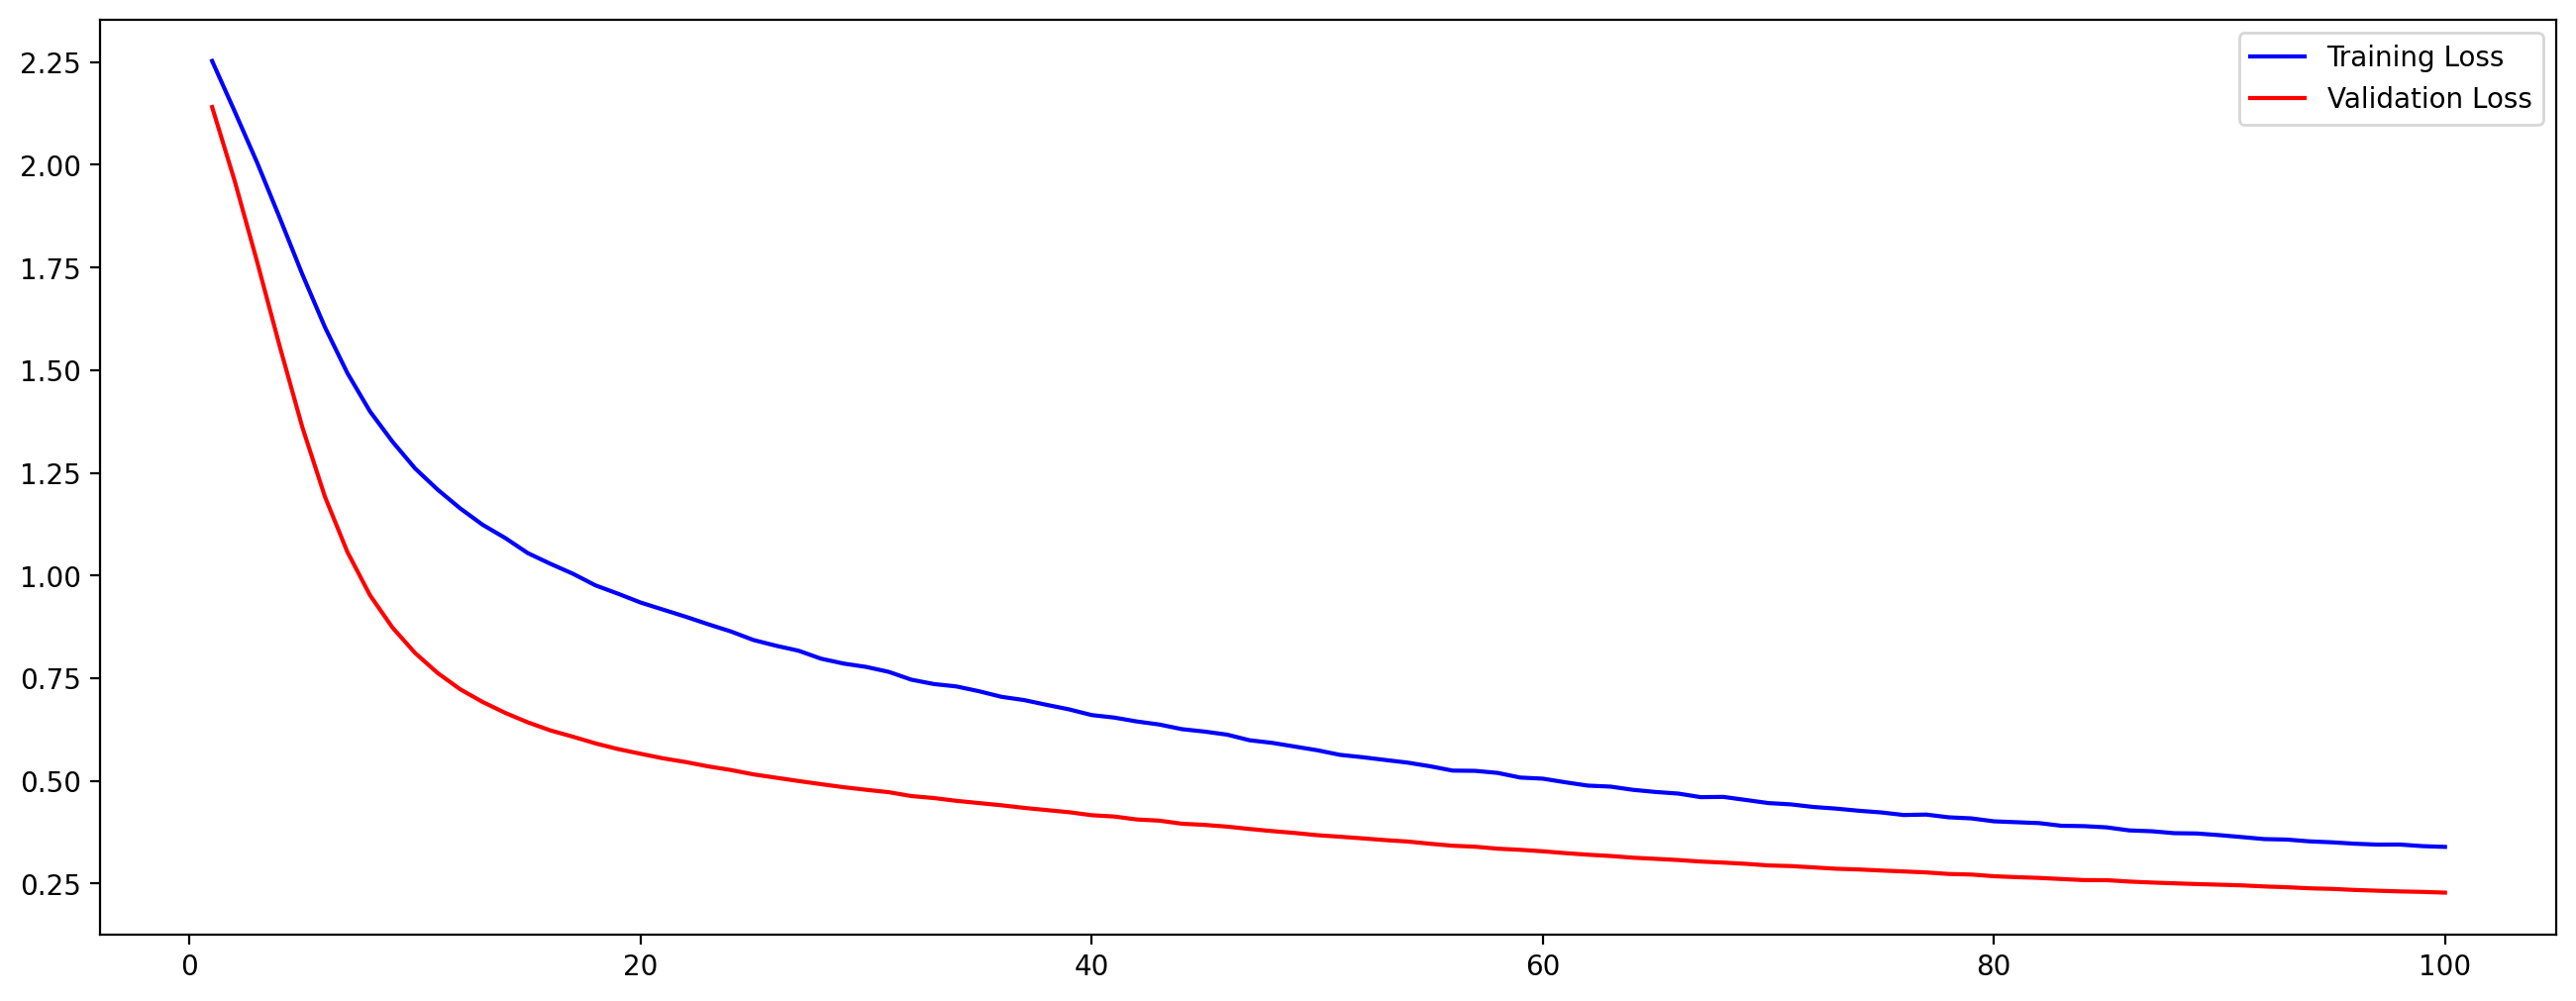

In [71]:
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val,   c = 'red',  label = 'Validation Loss')
plt.legend()

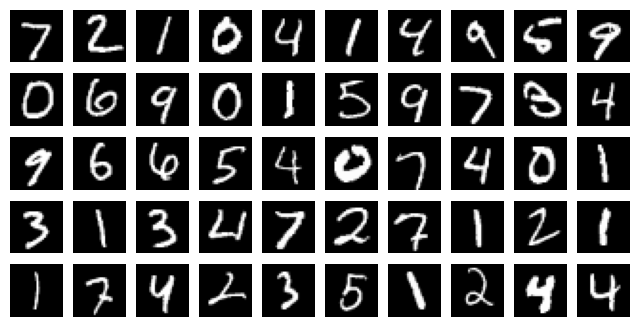

In [72]:
plt.figure(figsize = (8,4))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.axis('off')
  plt.imshow(x_test[i], cmap = 'gray')

In [73]:
np.set_printoptions(linewidth = 500)
model.predict(x_test[0:10])

1/1 [==============================] - 0s 76ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [74]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit, axis = 1)[0]
  print('The digit in the image is : ', digit)

In [75]:
predict_digit(x_test[4:5])

1/1 [==============================] - 0s 18ms/step
The digit in the image is :  4
